<a href="https://colab.research.google.com/github/somiljain0107/Automation/blob/master/Copy_of_myproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
def load_data():
  
    
    datasets = ['../input/seg_train/seg_train', '../input/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../input/seg_train/seg_train


FileNotFoundError: ignored

In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


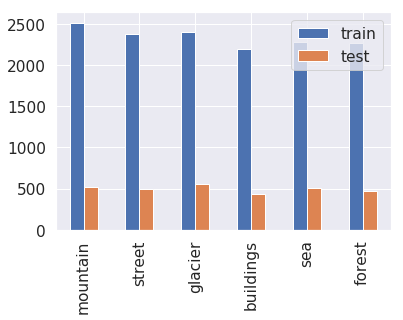

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

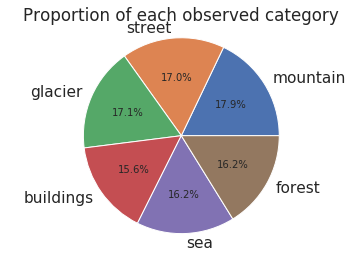

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

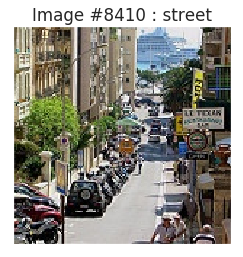

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

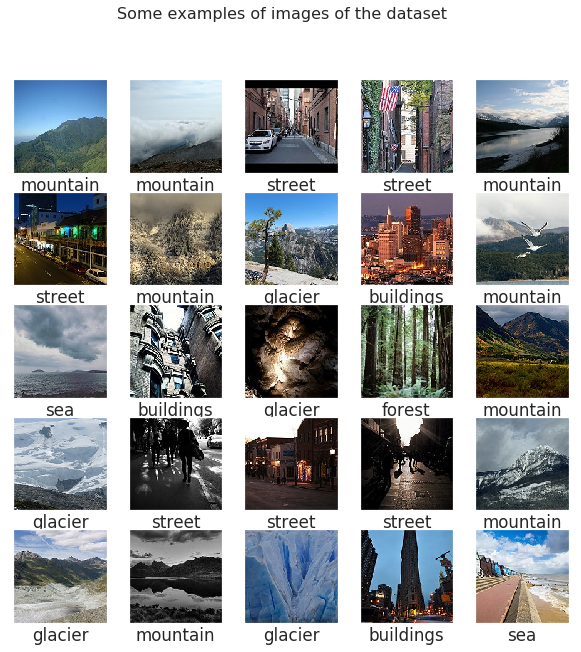

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/20
11227/11227 [==============================] - 9s 798us/sample - loss: 1.2029 - acc: 0.5484 - val_loss: 0.9420 - val_acc: 0.6462
Epoch 2/20
11227/11227 [==============================] - 6s 512us/sample - loss: 0.7826 - acc: 0.7120 - val_loss: 0.8539 - val_acc: 0.6772
Epoch 3/20
11227/11227 [==============================] - 5s 414us/sample - loss: 0.6219 - acc: 0.7755 - val_loss: 0.7070 - val_acc: 0.7474
Epoch 4/20
11227/11227 [==============================] - 5s 420us/sample - loss: 0.4614 - acc: 0.8372 - val_loss: 0.7136 - val_acc: 0.7474
Epoch 5/20
11227/11227 [==============================] - 5s 438us/sample - loss: 0.3462 - acc: 0.8829 - val_loss: 0.7459 - val_acc: 0.7414
Epoch 6/20
11227/11227 [==============================] - 5s 436us/sample - loss: 0.2944 - acc: 0.9009 - val_loss: 0.6843 - val_acc: 0.7813
Epoch 7/20
11227/11227 [==============================] - 5s 426us/sample - loss: 0.1656 - acc: 0.9498 - val_lo

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

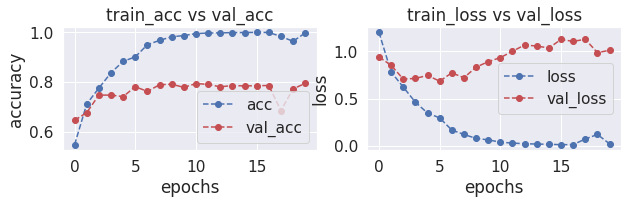

In [ ]:
plot_accuracy_loss(history)

We should evaluate the model performance on test set

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 1s 264us/sample - loss: 1.0085 - acc: 0.7837


We see that we achieve 0.76 accuracy on the testing test. We got a slight underfitting :(

Let's see how the classifier is doing on random images.

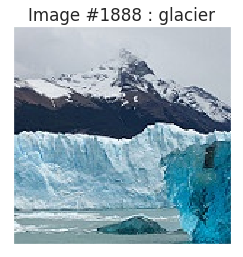

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.


58892288/58889256 [==============================] - 0s 0us/step


Get the features directly from VGG16

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

## Visualize the features through PCA

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

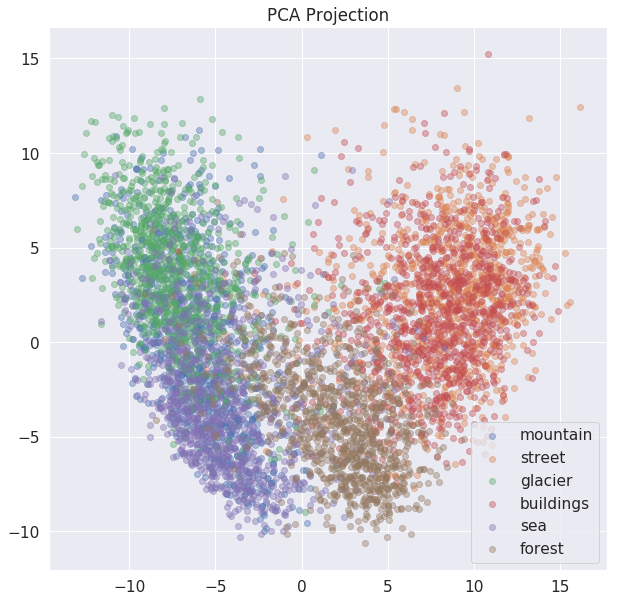

In [ ]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

We can identifying clusters thanks to this PCA. The clusters correspond more or less to the labels.

We see that glacier and mountain points are very close to each other, as VGG sees them as very similar.

We see that there is no distinction between building and street.
 

## Training on top of VGG

Let's train a simple one-layer Neural Network on the features extracted from VGG.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 1s 63us/sample - loss: 0.5290 - acc: 0.8075 - val_loss: 0.3963 - val_acc: 0.8554
Epoch 2/15
11227/11227 [==============================] - 0s 44us/sample - loss: 0.3053 - acc: 0.8885 - val_loss: 0.4216 - val_acc: 0.8532
Epoch 3/15
11227/11227 [==============================] - 1s 47us/sample - loss: 0.2421 - acc: 0.9168 - val_loss: 0.3811 - val_acc: 0.8675
Epoch 4/15
11227/11227 [==============================] - 0s 41us/sample - loss: 0.2018 - acc: 0.9282 - val_loss: 0.3396 - val_acc: 0.8807
Epoch 5/15
11227/11227 [==============================] - 0s 44us/sample - loss: 0.1670 - acc: 0.9434 - val_loss: 0.3612 - val_acc: 0.8746
Epoch 6/15
11227/11227 [==============================] - 0s 42us/sample - loss: 0.1497 - acc: 0.9496 - val_loss: 0.3773 - val_acc: 0.8707
Epoch 7/15
11227/11227 [==============================] - 0s 43us/sample - loss: 0.1316 - acc: 0.9570 - val_loss: 0.3

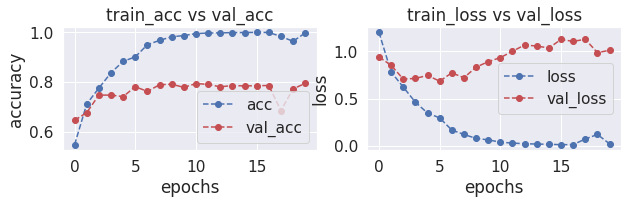

In [ ]:
plot_accuracy_loss(history)

We should get approximately 0.844 accuracy (+0.1 accuracy) over the simple ConvNet.

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

3000/3000 [==============================] - 0s 90us/sample - loss: 0.4345 - acc: 0.8730


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

We define n_estimators Neural Networks. 

Each Neural Network will be trained on random subsets of the training dataset. Each subset contains max_samples samples.

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Train on 10104 samples, validate on 1123 samples
Epoch 1/10
10104/10104 [==============================] - 1s 70us/sample - loss: 0.5195 - acc: 0.8076 - val_loss: 0.3429 - val_acc: 0.8878
Epoch 2/10
10104/10104 [==============================] - 1s 58us/sample - loss: 0.2550 - acc: 0.9116 - val_loss: 0.3352 - val_acc: 0.8923
Epoch 3/10
10104/10104 [==============================] - 0s 45us/sample - loss: 0.1892 - acc: 0.9349 - val_loss: 0.2939 - val_acc: 0.9074
Epoch 4/10
10104/10104 [==============================] - 0s 44us/sample - loss: 0.1419 - acc: 0.9540 - val_loss: 0.2708 - val_acc: 0.9163
Epoch 5/10
10104/10104 [==============================] - 0s 49us/sample - loss: 0.1097 - acc: 0.9671 - val_loss: 0.2762 - val_acc: 0.9110
Epoch 6/10
10104/10104 [==============================] - 0s 43us/sample - loss: 0.0933 - acc: 0.9721 - val_loss: 0.2816 - val_acc: 0.9225
Epoch 7/10
10104/10104 [==============================] - 0s 42us/sample - loss: 0.0664 - acc: 0.9841 - val_loss: 0.2

We aggregate each model individual predictions to form a final prediction.

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

We should improve our result as we have a lower variance.

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.889


# Fine Tuning VGG ImageNet

In [ ]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 9, 9, 512)         0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
__________

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 6s 532us/step - loss: 0.5956 - acc: 0.7682 - val_loss: 0.4633 - val_acc: 0.8322
Epoch 2/10
11227/11227 [==============================] - 4s 397us/step - loss: 0.3020 - acc: 0.8912 - val_loss: 0.3113 - val_acc: 0.8995
Epoch 3/10
11227/11227 [==============================] - 4s 388us/step - loss: 0.2298 - acc: 0.9160 - val_loss: 0.4231 - val_acc: 0.8703
Epoch 4/10
11227/11227 [==============================] - 4s 390us/step - loss: 0.1940 - acc: 0.9303 - val_loss: 0.3473 - val_acc: 0.8824
Epoch 5/10
11227/11227 [==============================] - 4s 385us/step - loss: 0.1563 - acc: 0.9440 - val_loss: 0.3840 - val_acc: 0.8917
Epoch 6/10
11227/11227 [==============================] - 4s 399us/step - loss: 0.1249 - acc: 0.9563 - val_loss: 0.3742 - val_acc: 0.8928
Epoch 7/10
11227/11227 [==============================] - 4s 396us/step - l

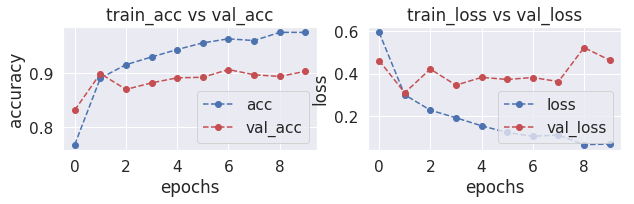

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8933333333333333
